# Pandas -- Love and Hate

If you've never used `pandas` before, it's amazing. It will also frustrate you to tears. 

High level tip -- try to represent data in the proper format: floats as floats; ints as ints; etc. Especially if you have dates, or timestamps, or datetimestamps, keep them in that format. The temptation to operate on them like strings may be overwhelming, but resist! In the long run you might prevail. :\

In [1]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.1.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.16.1
Mon Jun 01 14:17:01 2015 PDT

In [2]:
# Doing this in python 2.7 code allows for most of the code to be python 3 portable.
# But you have to write your print functions: print("Hello world.")
# from __future__ import division, absolute_import, print_function, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 


import numpy as np
import pandas as pd

### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [4]:
dframe = pd.read_csv("../data/coal_prod_cleaned.csv")

## Notebook Extensions -- qgrid

In [5]:
# Check out http://nbviewer.ipython.org/github/quantopian/qgrid/blob/master/qgrid_demo.ipynb for more (including demo)
import qgrid # Best practices is to put imports at the top of the Notebook.
qgrid.nbinstall(overwrite=True)

In [6]:
qgrid.show_grid(dframe[['MSHA_ID', 'Year', 'Mine_Name', 'Mine_State', 'Mine_County']], remote_js=True)

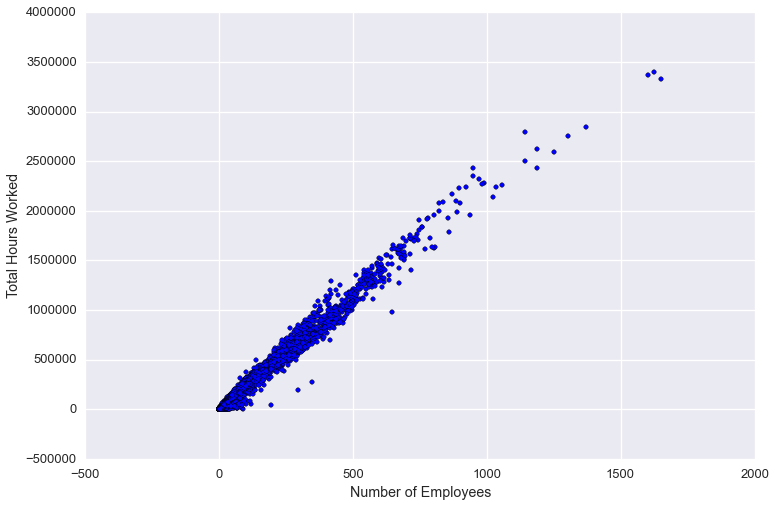

In [7]:
plt.scatter(dframe.Average_Employees, dframe.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

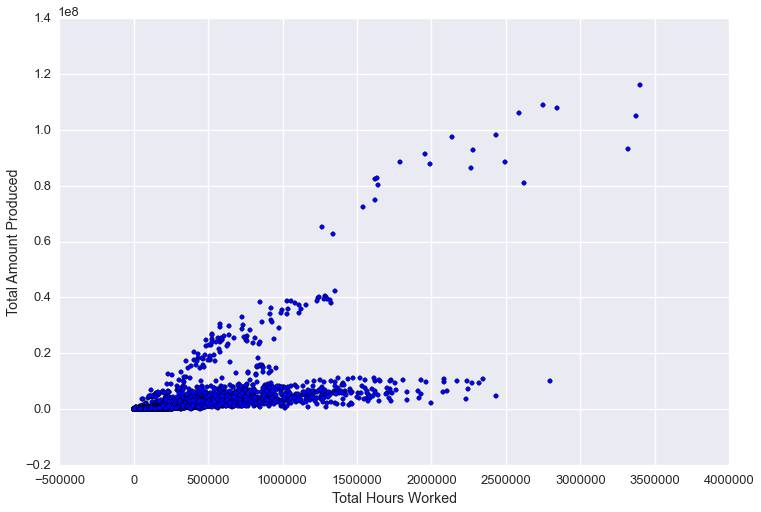

In [8]:
plt.scatter(dframe.Labor_Hours, dframe.Production_short_tons, )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")

In [9]:
colors = sns.color_palette(n_colors=11)

In [10]:
color_dict = {key: value for key, value in zip(sorted(dframe.Year.unique()), colors)}

In [11]:
color_dict

{2002: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2003: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2004: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2005: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2006: (0.8, 0.7254901960784313, 0.4549019607843137),
 2007: (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 2008: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2009: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2010: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2011: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2012: (0.8, 0.7254901960784313, 0.4549019607843137)}

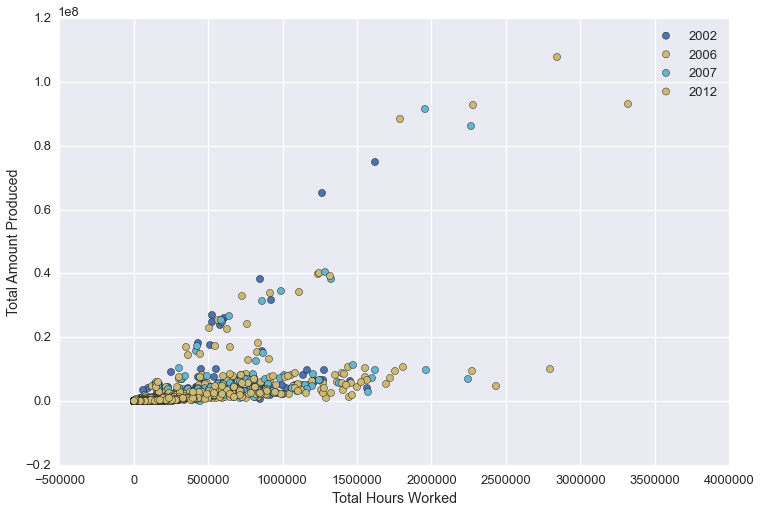

In [15]:
for year in sorted(dframe.Year.unique()[[0,4, 5, -1]]):
    plt.scatter(dframe[dframe.Year == year].Labor_Hours,
                dframe[dframe.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend();

# SQL connections

You will often use and interact with databases of some kind or another. Having the queries you ran to create the dataframes in a Notebook is great for future reference. There are many python/IPython connections to databases of all kinds: sqlite, mysql, impala, etc. 

In [16]:
# An updated implementation from Christian Perez at SVDS https://github.com/cfperez/ipython-sql
%load_ext sql
%reload_ext sql

In [17]:
coalproduction = dframe.copy()

In [25]:
%config SqlMagic.autopandas=True

In [18]:
%%sql sqlite://
PERSIST coalproduction

u'Persisted coalproduction'

In [19]:
%%sql sqlite://
SELECT DISTINCT company_type FROM coalproduction 
WHERE msha_id = 5000030

Done.


Company_Type
Independent Producer Operator


In [26]:
dbtest = %sql SELECT * FROM coalproduction

Done.


In [27]:
type(dbtest)

pandas.core.frame.DataFrame

In [22]:
db_demo = dbtest.DataFrame()

In [23]:
db_demo.head()

,index,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,0,102838,4,Independent Producer Operator,2712,Appalachia Southern,Bibb,Hebron Mine,Alabama,Permanently abandoned,Surface,Birmingham Coal & Coke Company,"2477 Valleydale Rd. S. B3, Birmingham, AL 35244",Mine only,10572,None,2002
1,1,103184,5,Independent Producer Operator,2480,Appalachia Southern,Fayette,Berry Mine,Alabama,Temporarily closed,Surface,Midas Coal Company Incorporate,"401 10th Avenue, S. E, Cullman, AL 35055",Mine only,9725,None,2002
2,2,100329,55,Operating Subsidiary,123618,Appalachia Southern,Jefferson,Concord Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Road, Adger, AL 35006",Preparation Plant,0,United Mine Workers of America,2002
3,3,100851,331,Operating Subsidiary,748182,Appalachia Southern,Jefferson,Oak Grove Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Rd, Adger, AL 35006",Mine only,1942153,United Mine Workers of America,2002
4,4,102354,28,Independent Producer Operator,55306,Appalachia Southern,Jefferson,Lindbergh,Alabama,Active,Surface,C & H Mining Company Inc,"P.O. Box 70250, Tuscaloosa, AL 35407",Mine only,168446,None,2002


In [ ]:
FileLink("Overview.ipynb")